In [2]:
import geopandas as gpd 
import pandas as pd 
import numpy as np 
from sqlalchemy import create_engine

In [4]:
!pip install mysqlclient 

In [5]:
host=""
port=3306
dbname="election_data"
user="ayush"
password="electme20214eva"
database_connection = create_engine('mysql+pymysql://{0}:{1}@{2}/{3}'
            .format(user, password,host, dbname)).connect()


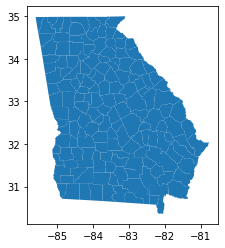

In [6]:
counties = gpd.read_file("../tl_2016_us_county/tl_2016_us_county.shp")
counties = counties[counties.STATEFP == '13']
counties.plot()

for col in ['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'LSAD', 'ALAND', 'AWATER']: 
    counties[col] = counties[col].astype('int32')
    
for col in ['ALAND', 'AWATER', 'INTPTLAT', "INTPTLON"]: 
    counties[col] = counties[col].astype("float")

In [38]:
counties.dtypes

STATEFP        int32
COUNTYFP       int32
COUNTYNS       int32
GEOID          int32
NAME          object
NAMELSAD      object
LSAD           int32
CLASSFP       object
MTFCC         object
CSAFP         object
CBSAFP        object
METDIVFP      object
FUNCSTAT      object
ALAND        float64
AWATER       float64
INTPTLAT     float64
INTPTLON     float64
geometry    geometry
dtype: object

In [9]:
counties.rename({'NAME': 'COUNTYNAME'}, axis = 1).to_sql('counties', database_connection, index = False, if_exists='append')

In [14]:
contests = pd.read_csv("../data/final_tables/contests.csv")
contests.to_sql('contests', database_connection, index = False, if_exists = 'append')

In [11]:
candidates = pd.read_csv("../data/final_tables/candidates.csv")
candidates.to_sql('candidates', database_connection, index = False, if_exists = 'append')

In [16]:
results = pd.read_csv("../data/final_tables/results_by_county.csv")
results.to_sql('results_by_county', database_connection, index = False, if_exists = 'append')

In [19]:
pop = pd.read_csv("../data/final_tables/population.csv")
pop.rename({"population":"population_amount"}, axis = 1).to_sql('population', database_connection, index = False, if_exists = 'append')

In [20]:
precinct = pd.read_csv("../data/final_tables/county_precinct.csv")
precinct.to_sql('precinct_turnout', database_connection, index = False, if_exists = 'append')

In [21]:
turnout = pd.read_csv("../data/final_tables/county_turnout.csv")
turnout.to_sql('county_turnout', database_connection, index = False, if_exists = 'append')

In [22]:
database_connection.close()